# Redes Neurais

## 1. Histórico

* 1943
    - Wax Ten McCulloch e Walter Pitts propõem um modelo matemático para representar o neurônio biológico
    - O objetivo era entender melhor o funcionamento do cérebro para aplicações médicas e na psicologia
* 1949
    - Donald Hebb desenvolve a **Teoria do Aprendizado Neural**
    - Quanto mais correlacionadas estiverem as saídas de dois neurônios e cascata, maior deverá ser o nível ou a intensidade de suas ligações
* 1959
    - Bernard Widrow desenvolve o **ADALINE** (_ADAptative LINear Element_)
    - Franck Rosemblatt conclui o **Perceptron**
* 1969
     - Marvin Minsk e Seymour Papert publicam o livro _"Perceptrons"_ onde provam que o perceptron apresenta sérias restrições, sendo capaz apenas de solucionar problemas linearmente separáveis
* 1986
    - James McClelland e David Rumelhart desenvolvem as redes **MLP** (_Multi Layer Perceptron_) e o algoritmo de treinamento **Backpropagation**

## 2. O Neurônio

Representação de um neurônio biológico


Representação de um neurônio artifical


A ideia básica do funcionamento do neurônio artificial é que tenhamos entradas ponderadas pelos respectivos pesos, estas entradas são processadas e tenhamos uma saída. Este mecanismo simula o comportamento das sinapses (a comunicação entre neurônios), onde os dendritos recebem deterinadas cargas e o neurônio processa e envia a saída para outros neurônios.

## 3. Aprendizado

Algo intríseco nas redes neurais são os métodos de aprendizado, fundamentais para o seu funcionaento e para a qualidade dos seus resultados, mas como máquinas aprendem? Da mesma forma que nós:

1. Exemplos de entrada, onde garantimos que aqueles dados estão corretos
2. Treinamento com valores aleatórios
3. Ajustes no que sabemos de acordo com o treinamento

No caso específico das redes neurais, a fase de aprendizado está intimamente relacionada com os pesos das entradas já que elas contém normalmente dados brutos acerca dos valores trabalhados e do resultado, os pesos atribuidos (fundamentais para o calculo) são o resultado do aprendizado, podemos dizer que é feita uma busca nos pesos para que se ajustem aos exemplos de entrada.

O exemplo a seguir segue o padrão mais tradicional de aprendizado de máquina relacionado ao ajuste dos pesos em redes neurais, mas se tratando de uma busca, seria possível até mesmo usar algoritmos genéticos ou o PSO para isso.

### 3.1 Exemplo de entrada

| tamanho | peso | tipo |
|  -  - |
| 2 | 4 | verde |
| 5 | 8 | vermelho|
| 2.9 | 5 | verde |
| 3.5 | 5.8 | vermelho |

Numa situação real teríamos vários outros exemplos nesta tabela, se formos plotar um gráfico para vermos como está dividida a população a ser analizada teríamos algo mais ou menos assim:

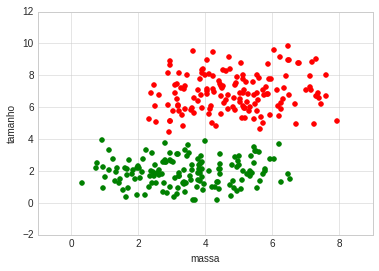

In [104]:
from matplotlib import pyplot as plt
from random import triangular as rnd
import pandas as pd
plt.style.use('seaborn-whitegrid')
%matplotlib inline

# amostras com valores aleatórios
vermelho = pd.DataFrame([(rnd(low=2, high=8), rnd(low=4, high=10)) for i in range(150)], columns=['mass', 'tam'])
verde = pd.DataFrame([(rnd(low=0, high=7), rnd(low=0, high=4)) for i in range(150)], columns=['mass', 'tam'])

# configurando o gráfico
fig, ax = plt.subplots()
ax.scatter(vermelho['mass'], vermelho['tam'], color='r')
ax.scatter(verde['mass'], verde['tam'], color='g')
ax.grid(True)
ax.set_xlabel('massa')
ax.set_ylabel('tamanho')

# plotando...
plt.show()

O que o gráfico acima mostra é que escolhendo os atributos certos, podemos ver que grupos de indivíduos foram criados e ao usarmos uma rede neural como um algoritmo classificador, podemos ensina-la o padrão de cada grupo e ela poderá dizer em qual grupo se enquadraria novos indivíduos que precisaríamos classificar. Isto funciona como se o algoritmo classificador traçasse uma linha tangencial aos dois grupos.

Sei que neste ponto a utilização prática ainda não está tão clara, mas se considerarmos que estas variáveis em vez de representar tamanho e massa, indiquem a pressão sanguinea e a quantidade de oxigênio no sague, poderíamos atribuir outras variáveis que dizem respeito a saúde de alguns pacientes e a rede neural se encarregará, após o devido treinamento, de dizer quando colocar ou retirar algum aparelho do paciente ou ainda quando aplicar tal medicação. Outros inúmeros exemplos poderiam ser usados que vão desde o uso na telefonia, conexões na internet, reconhecimento de padrões em imagens e até mesmo auxiliar na mineração de dados.

Percebam que na tabela acima não temos os pesos de entrada, então o treinamento de nossa rede neural consistirá em encontrar quais pesos representam bem cada variável.

### 3.2 Treinamento

Como nesta fase nosso objetivo é encontrar os pesos de cada variável, então começamos pela maneira mais óbvia: chutando! ou seja, usando valores aleatórios. Estes pesos aleatórios serão atualizados a cada passagem pela própria rede neural até que consigam representam sastifatoriamente os grupos de indivíduos, ou seja é como se estivéssemos movendo a linha que separa os dois grupos a fim de encontrar uma reta tangencial.

Para o exemplo, usarei uma rede Perceptron, que nada mais é do que uma rede neural formada por apenas um único neurônio. O passo a passo realizado será:

1. gerar pesos aleatórios na 1 tentativa e nas proximas atualizar estes peso
2. receber na entrada valores conhecidos ponderados pelos pesos 
3. realizar o somatório das entradas ponderadas
4. calcular a saída usando a função de ativação
5. efetuar um calculo que irá atualizar o peso (expresso pela equação abaixo)

#### Somatório das entradas ponderadas

$ \displaystyle  u = \sum^{n}_{i = 0} w_i \times x_i  $

onde:

* $w_i$ -> peso
* $x_i$ -> entrada

#### Função de ativação

Esta função é quem diz de fato o resultado, no caso do nosso exemplo se o resultado é verde ou vermelho.

Existem várias funções de ativação, as mais conhecidas são:

**Função sinal**

f(x) = $ \displaystyle  1 ,\: se\: x > 0 \\ 0,\: se\: x \leq 0$

**Função linear por partes**

f(x) = $ \displaystyle  0, \: se\: x \leq 0 \\ x + a, \: se \: -a < x < a \\ 1, \: se \: x \ge a$

**Função sigmoidal**

f(x) = $\displaystyle \frac{1}{1+e^{-ax}}$

#### Atualização de pesos

$w = w + \eta \times (d^k - y) \times x^k$

onde:

* w -> valor dos pesos
* $\eta$ -> constante de taxa de aprendizado { 0 < $\eta$ < 1 }
* $d^k$ -> valor esperado para aquela saída
* y -> saída produzida pelo perceptron
* $x^k$ -> amostra atual do treinamento

O valor dos pesos sempre estará entre 0 e 1 assim como a taxa de apendizado empregada como a constante $\eta$ na função de atualização de pesos.

imaginemos uma situação hipotética em que temos como entrada os valores 2 e 7 (respectivamente tamanho e massa) e os pesos aleatórios das variáveis de entrada 0.331 e 0.0051

| tamanho | massa |
| - | - |
| 2 | 7 |
| 0.331 | 0.0051 | **pesos**|

O somatório dos pesos será:

$u = \sum^{n}_{i = 0} w_i * x_i  $ -> $u = (2 * 0.331) + (7 * 0.0051)$

u = 0.6977

se usarmos a função sinal teremos como saída **1**, o que pode significa diversas coisas em relação a lógica do nosso código, por exemplo se tomarmos a população vermelha como 1 e verde como 0, o perceptron está nos dizendo que para ele aqueles dados de entrada representam um membro da população vermelha, mas e se for o contrário? e na realidade os dados sejam de uma partícula verde e ele está dizendo que é uma partícula vermelha? Então precisamos atualizar nossos pesos até que a margem de acertos nos testes seja aceitável. Para atualizar os pesos fazemos

$w = w + \eta * (d^k - y) * x^k$

$w_1 = 0.331 + 0.5 * (0 - 1) * 2$

$w_2 = 0.0051 + 0.5 * (0 - 1) * 7$

$w_1 = -0.669$

$w_2 = -3.4949$

#### Bias

Bias é uma outra entrada de valor -1 usada para equilibrar os resultados da fase de aprendizado, então vamos repetir as operações acima e ver se de fato faz diferença.

Somatório dos pesos:

$ u = \sum_{i=0}^n{w_i * x_i} -> u = (2 * 0331) + (7*0.0051) + (-1 * 0.635) $

$ u = 433.40070000000003 $

$ w = w + \eta * (d^k - y) * x^k $

$ w_1 = 0.331 + 0.5 * (0 - 1) * 2  =>  w_1 = \textbf{-0.669}$

$ w_2 = 0.0051 + 0.5 * (0 - 1) * 7 =>  w_2 = \textbf{-3.4949}$

$ w_{bias} = -1 + 0.5 * (0 - 1) * -1 =>  w_{bias} = \textbf{-0.5}$

A vista de calculo de atualização de pesos não parece ter mudado muita coisa, agora vamos implementar uma rede perceptron e vamos comparar os resultados com o bias e sem o bias, comente as linhas indicadas para retirar ou manter o bias.

In [105]:
import numpy as np
class Perceptron(object):
    '''
    Implementacao do perceptron
    '''
    def __init__(self, dimensoes):
        '''
        :dimensoes: list com o nome das variaveis de entrada
        '''
        for dim in dimensoes:
            self.__setattr__(dim, np.random.rand())
        self.bias = np.random.rand() # comente aqui
        self.fitness = 0
            
    def run(self, valores):
        '''
        :valores: dict com os valores de entrada
        '''
        
        # somatorio da entrada
        s = 0
        for v in valores.keys():
            if v != 'resultado':
                s += self.__getattribute__(v) * valores[v]
        s+= self.bias * -1 # comente aqui
            
        # funcao sinal:
        if s > 0:
            return 1
        else:
            return 0
        
    def atualiza_pesos(self, amostra, result):
        '''
        :amostras: dict {variaveis:valores, resultado: 0 ou 1}
        :result: resultado de run()
        '''
        
        for k in amostra.keys():
            if k != 'resultado':
                new_w = self.__getattribute__(k) + 0.5 * (amostra['resultado'] - result) * amostra[k]
                self.__setattr__(k, new_w)
        self.bias = self.bias + 0.5 * (amostra['resultado'] - result) * -1 # comente aqui
                
    def treinamento(self, amostras, testes):
        '''
        :amostras: list com dicts {variaveis:valores, resultado: 0 ou 1}
        :testes: int com a quantidade de testes a serem feitos (epoch)
        '''
        
        tmp = 0
        fitness = 0 # percentual de acertos
        for i in range(testes):
            acertos = 0
            for a in amostras:
                result = self.run(a)
                if a['resultado'] != result:
                    self.atualiza_pesos(a, result)
                else:
                    acertos += 1
                    
            fitness = acertos / len(amostras)
            #if fitness == 1: break
            tmp += 1
            if tmp % 100 == 0:
                print('|', tmp, self.fitness*100, end='|')
            self.fitness = fitness

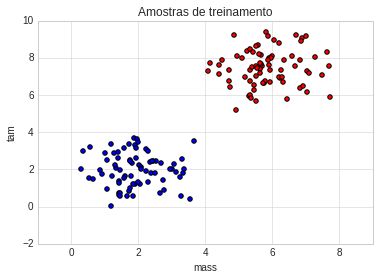

In [106]:
# vou considerar 1 como vermelho e 0 como verde
amostra = [{'mass':rnd(low=4, high=8), 'tam': rnd(low=5, high=10), 'resultado':1} for _ in range(75)]
amostra += [{'mass':rnd(low=0, high=4), 'tam': rnd(low=0, high=4), 'resultado':0} for _ in range(75)]

# visualização das amotras de treinamento
fig, ax = plt.subplots()
data = pd.DataFrame(amostra)
data[:75].plot.scatter(x='mass', y='tam', title='Amostras de treinamento', color='r', ax=ax)
data[75:].plot.scatter(x='mass', y='tam', title='Amostras de treinamento', color='b', ax=ax, grid=True)

In [107]:
percep = Perceptron(['mass', 'tam']) # cria o objeto

In [108]:
percep.treinamento(amostra, 1000) # treinamento

| 100 100.0|| 200 100.0|| 300 100.0|| 400 100.0|| 500 100.0|| 600 100.0|| 700 100.0|| 800 100.0|| 900 100.0|| 1000 100.0|

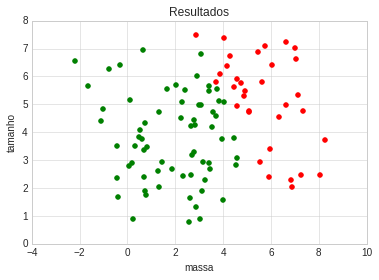

In [109]:
fig, ax = plt.subplots()

ams = [{'mass':rnd(low=-3, high=9), 'tam': rnd(low=0, high=8)} for _ in range(100)]
vrd = []
vrm = []
for i in ams:
    tmp = percep.run(i)
    if tmp > 0:
        vrm.append(i)
    else:
        vrd.append(i)
        
vermelho = pd.DataFrame(vrm, columns=['mass', 'tam'])
verde = pd.DataFrame(vrd, columns=['mass', 'tam'])
ax.set_title('Resultados')
ax.scatter(vermelho['mass'], vermelho['tam'], color='r')
ax.scatter(verde['mass'], verde['tam'], color='g')
ax.grid(True)
ax.set_xlabel('massa')
ax.set_ylabel('tamanho')


## 4.Tipos de redes neurais

Na seção anterior vimos o conceito do aprendizado implementado numa rede neural e implementamos uma rede **perceptron**, ou seja, uma rede neural composta por apenas um neurônio e por ser tão simples ela tem suas limitações, a principal talvez seja a dificuldade que tem em trabalhar com problemas não-linearmente separáveis.

<table>
<tr>
<td><img src="figures/linear.svg" width="315" height="180" alt="">problema de classificação linear</td>
<td><img src="figures/nao_linear.svg" width="315" height="180" alt="">problema de classificação não-lienar</td>
</tr>
</table>

### 4.1 Adaline

**Adaline** significa _'adaptative linear element'_, a principal diferença para o perceptron é que o adaline leva em consideração a taxa de erro dos testes.

O passo a passo da fase de treinamento é bem similar ao perceptron:

1. gerar pesos aleatórios na 1 tentativa e nas proximas atualizar estes peso
2. receber na entrada valores conhecidos ponderados pelos pesos 
3. realizar o somatório das entradas ponderadas
4. calcular a saída usando a função de ativação
5. calcular a taxa de erro (Eqm)
6. efetuar um calculo que irá atualizar o peso

A única função que ainda não foi exibida é a Eqm, responsável por avaliar a taxa de erro:

$\displaystyle E_{qm}(w) = \frac{\sum_{k=0}^N{ (d^k - u)^2}}{p}$

Ou seja: fazemos o somatório do resultado desejado menos o somatório da entrada, elevamos o resultado ao quadrado e dividimos pela quantidade de amostras de teste.

Ao final das contas o código fica bem parecido com o do perceptron:

In [110]:
class Adaline(object):
    '''
    Implementacao do perceptron sem bias
    '''
    def __init__(self, dimensoes):
        '''
        :dimensoes: list com o nome das variaveis de entrada
        '''
        for dim in dimensoes:
            self.__setattr__(dim, np.random.rand())
        self.bias = np.random.rand()
        self.fitness = 0
        self._eqm = None
        
    def run(self, valores):
        '''
        :valores: dict com os valores de entrada
        '''
        
        # somatorio da entrada
        s = 0
        for v in valores.keys():
            if v != 'resultado':
                s += self.__getattribute__(v) * valores[v]
        s+= self.bias * -1
        self._eqm = s
            
        # funcao sinal:
        if s > 0:
            return 1
        else:
            return 0
        
    def atualiza_pesos(self, amostra, result):
        '''
        :amostras: dict {variaveis:valores, resultado: 0 ou 1}
        :result: resultado de run()
        '''
        
        for k in amostra.keys():
            if k != 'resultado':
                new_w = self.__getattribute__(k) + 0.5 * (amostra['resultado'] - result) * amostra[k]
                self.__setattr__(k, new_w)
        self.bias = self.bias + 0.5 * (amostra['resultado'] - result) * -1 
        
    def eqm(self, amostras):
        '''
        :amostras: list com dicts {variaveis:valores, resultado: 0 ou 1}
        '''
        p = len(amostras)
        
        s = sum(map(lambda x: (x['resultado'] - self._eqm)**2, amostras))
#         s = 0
#         for i in amostras:
#             s += (i['resultado'] - self._eqm)**2
            
        return s/p
                
    def treinamento(self, amostras, testes, eqm):
        '''
        :amostras: list com dicts {variaveis:valores, resultado: 0 ou 1}
        :testes: int com a quantidade de testes a serem feitos (epoch)
        '''
        
        tmp = 0
        fitness = 0 # percentual de acertos
        err = 0 # guardaro o resultado de self.eqm
        for i in range(testes):
            acertos = 0
            for a in amostras:
                result = self.run(a)
                if a['resultado'] != result:
                    self.atualiza_pesos(a, result)
                else:
                    acertos += 1
                    
            err = self.eqm(amostras)
            if err <= eqm:
                break
            
            fitness = acertos / len(amostras)

            tmp += 1
            if tmp % 100 == 0:
                print('|', tmp,self.fitness*100, end='|')
            self.fitness = fitness

In [111]:
ada = Adaline(['mass', 'tam'])

In [112]:
ada.treinamento(amostra, 1000, 0.00001)

| 100 100.0|| 200 100.0|| 300 100.0|| 400 100.0|| 500 100.0|| 600 100.0|| 700 100.0|| 800 100.0|| 900 100.0|| 1000 100.0|

Agora que já vimos as diferenças na fase de treinamento, vamos ver a diferença de resultados na fase operacional:

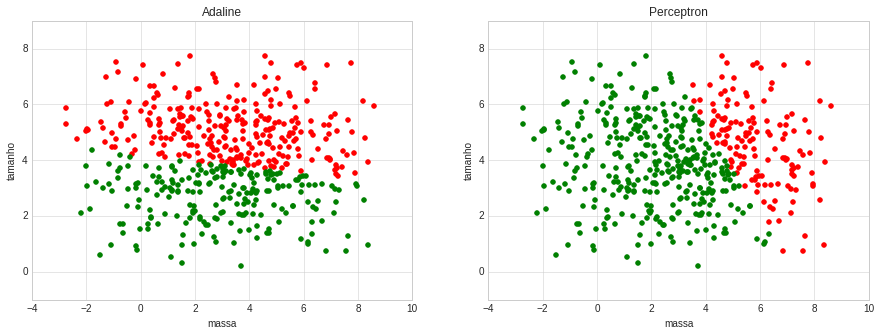

In [113]:
fig, ax = plt.subplots(ncols=2)
fig.set_size_inches(15, 5)

ams = [{'mass':rnd(low=-3, high=9), 'tam': rnd(low=0, high=8)} for _ in range(500)]

# executando a fase de operação do Adaline

vrd = []
vrm = []
for i in ams:
    tmp = ada.run(i)
    if tmp > 0:
        vrm.append(i)
    else:
        vrd.append(i)
        
vermelho = pd.DataFrame(vrm, columns=['mass', 'tam'])
verde = pd.DataFrame(vrd, columns=['mass', 'tam'])

ax[0].set_title('Adaline')
ax[0].scatter(vermelho['mass'], vermelho['tam'], color='r')
ax[0].scatter(verde['mass'], verde['tam'], color='g')
ax[0].grid(True)
ax[0].set_xlabel('massa')
ax[0].set_ylabel('tamanho')

# executando a fase de operação do Perceptron

vrd = []
vrm = []
for i in ams:
    tmp = percep.run(i)
    if tmp > 0:
        vrm.append(i)
    else:
        vrd.append(i)
        
vermelho = pd.DataFrame(vrm, columns=['mass', 'tam'])
verde = pd.DataFrame(vrd, columns=['mass', 'tam'])

ax[1].set_title('Perceptron')
ax[1].scatter(vermelho['mass'], vermelho['tam'], color='r')
ax[1].scatter(verde['mass'], verde['tam'], color='g')
ax[1].grid(True)
ax[1].set_xlabel('massa')
ax[1].set_ylabel('tamanho')

Internamente temos as seguintes diferenças nos pesos entre o Adaline e o Perceptron para cada variavel de entrada neste exercício:

In [114]:
pd.DataFrame([percep.__dict__, ada.__dict__], index=['Perceptron', 'Adaline' ])

,_eqm,bias,fitness,mass,tam
Perceptron,NaN,4.541220,1,0.632763,0.381334
Adaline,6.16011,12.238427,1,0.337951,2.929897


Na prática o que temos é uma maior precisão do Adaline em relação ao perceptron, ele tem um nível menor de _"ruidos"_, ou seja, menos resultados errados na classificação de novos objetos.

### 4.2 MLP

O MLP _(Multi Layer Perceptron)_ surgiu para superar as limitações do Perceptron em relação a classificação não-linear, a ideia aqui é termos várias camadas de perceptrons, dividindo o hiperplano em diversas áreas correspondentes aos diferentes grupos a serem classificados.

<table>
<tr>
<td><img src="figures/nao_linear_2.svg" width="315" height="180" alt=""><p>Exemplo de problema de classificação não linear</p>
<p>onde cada cor representa um grupo distinto de objetos</p></td>
</tr>
</table>

### 4.2.1 Backpropagation